In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\shaneela\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# df = pd.read_csv("MaunaLoaDailyTemps-1 (3).csv",index_col='DATE',parse_dates = True)
# df = df.dropna()
# df

In [3]:
df = pd.read_csv("MaunaLoaDailyTemps-1 (3).csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df['year']= df['DATE'].dt.year
df

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year
0,2014-01-01,33.0,46.0,40.0,657,1756,2014
1,2014-01-02,35.0,50.0,43.0,657,1756,2014
2,2014-01-03,36.0,45.0,41.0,657,1757,2014
3,2014-01-04,32.0,41.0,37.0,658,1757,2014
4,2014-01-05,24.0,38.0,31.0,658,1758,2014
...,...,...,...,...,...,...,...
1820,2018-12-26,35.0,45.0,40.0,654,1752,2018
1821,2018-12-27,33.0,44.0,39.0,655,1752,2018
1822,2018-12-28,33.0,47.0,40.0,655,1753,2018
1823,2018-12-29,36.0,47.0,42.0,655,1753,2018


In [4]:
df[df['AvgTemp']>50]

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year
24,2014-01-25,41.0,62.0,52.0,659,1811,2014
107,2014-04-18,43.0,60.0,52.0,602,1841,2014
108,2014-04-19,43.0,60.0,52.0,602,1841,2014
114,2014-04-25,43.0,59.0,51.0,558,1843,2014
115,2014-04-26,45.0,62.0,54.0,557,1844,2014
...,...,...,...,...,...,...,...
1732,2018-09-29,43.0,61.0,52.0,613,1812,2018
1733,2018-09-30,43.0,62.0,53.0,613,1811,2018
1734,2018-10-01,40.0,63.0,52.0,613,1811,2018
1737,2018-10-04,43.0,58.0,51.0,614,1808,2018


In [5]:
(df['AvgTemp']>50).value_counts()

False    1494
True      331
Name: AvgTemp, dtype: int64

In [6]:
df[df['MaxTemp']==df['MaxTemp'].max()]['year']

533    2015
914    2016
Name: year, dtype: int64

In [7]:
df.corr()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset,year
MinTemp,1.000000,0.756071,0.917456,-0.426821,0.300492,0.008075
MaxTemp,0.756071,1.000000,0.951039,-0.374928,0.275876,-0.029029
AvgTemp,0.917456,0.951039,1.000000,-0.422829,0.304711,-0.015718
Sunrise,-0.426821,-0.374928,-0.422829,1.000000,-0.739530,-0.000930
Sunset,0.300492,0.275876,0.304711,-0.739530,1.000000,0.001064
year,0.008075,-0.029029,-0.015718,-0.000930,0.001064,1.000000


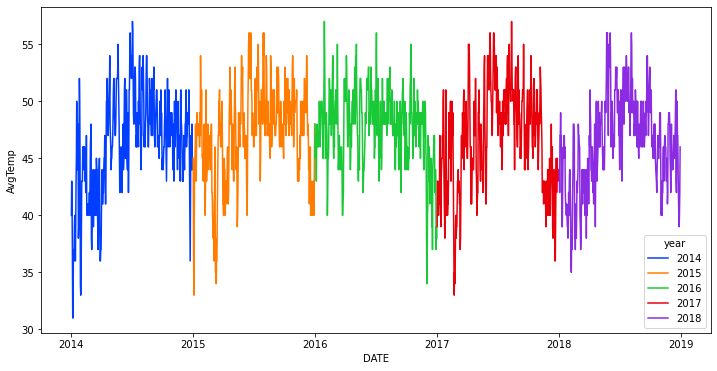

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE',y='AvgTemp',hue='year',data =df,palette='bright')
plt.show()

In [9]:
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index (df['DATE'])
#del df['DATE'],df['MaxTemp'],df['Sunrise'],df['Sunset'],df['MinTemp']

df = df.drop(columns = ['DATE','MinTemp', 'MaxTemp', 'Sunrise', 'Sunset', 'year'])
df = df.dropna()
df

,AvgTemp
DATE,
2014-01-01,40.0
2014-01-02,43.0
2014-01-03,41.0
2014-01-04,37.0
2014-01-05,31.0
...,...
2018-12-26,40.0
2018-12-27,39.0
2018-12-28,40.0


<AxesSubplot:xlabel='DATE'>

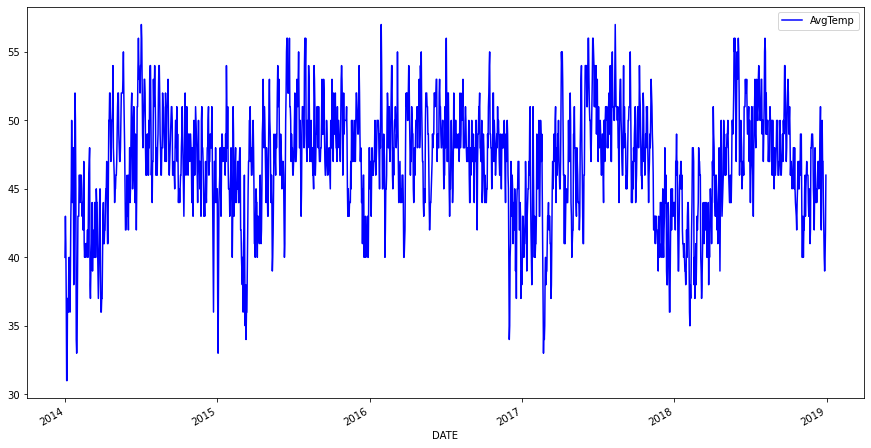

In [10]:
df.plot(figsize = (15,8),c = 'blue')

# checking Stationarity through Rolling Statistics

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

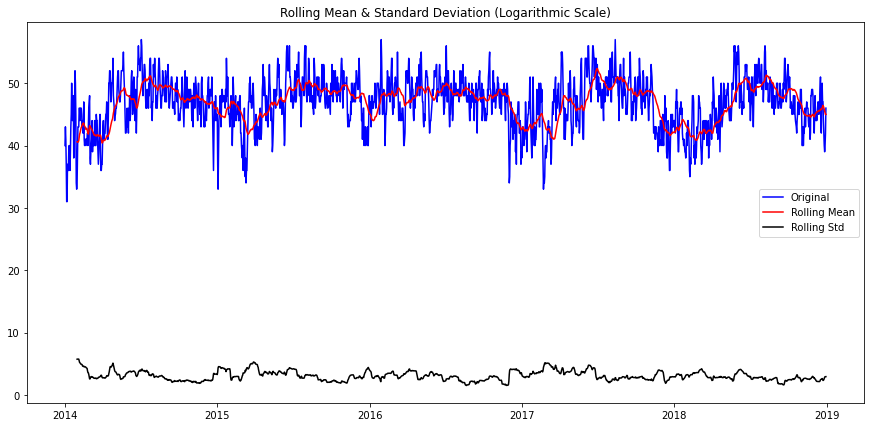

In [11]:
# Test for rolling statistics
mean_log = df.rolling(window = 30).mean() #rolling() --> Works for computing the moving statistical values
std_log = df.rolling(window = 30).std()

# Each value in the rolling mean series is the average of the current value and the previous 11 values

plt.figure(figsize=(15,7))
plt.plot(df, color='blue', label='Original')  # Plotting for the whole dataset --> Blue
plt.plot(mean_log, color='red', label='Rolling Mean') # Plotting for rolling mean --> Red
plt.plot(std_log, color='black', label='Rolling Std') # Plotting for rolling std  --> Black
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [12]:
mean_log

,AvgTemp
DATE,
2014-01-01,NaN
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN
...,...
2018-12-26,45.800000
2018-12-27,45.466667
2018-12-28,45.166667


<AxesSubplot:xlabel='DATE'>

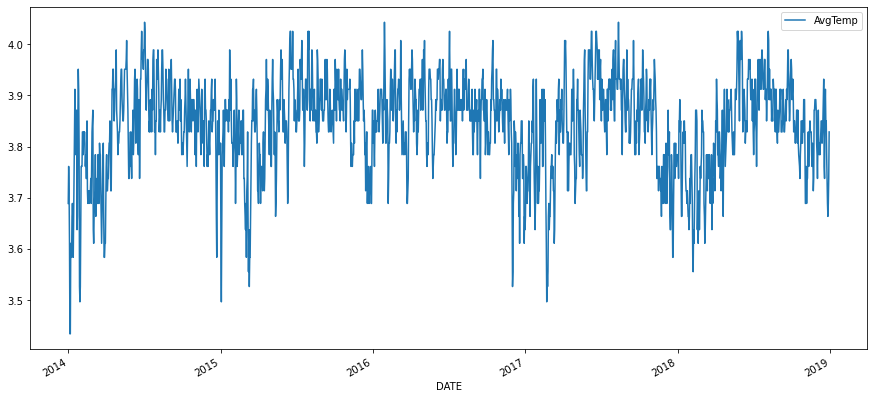

In [13]:
first_log = np.log(df)
first_log = first_log.dropna()  # Removing the null values if any are present
first_log.plot(figsize=(15,7))

In [14]:
first_log

,AvgTemp
DATE,
2014-01-01,3.688879
2014-01-02,3.761200
2014-01-03,3.713572
2014-01-04,3.610918
2014-01-05,3.433987
...,...
2018-12-26,3.688879
2018-12-27,3.663562
2018-12-28,3.688879


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

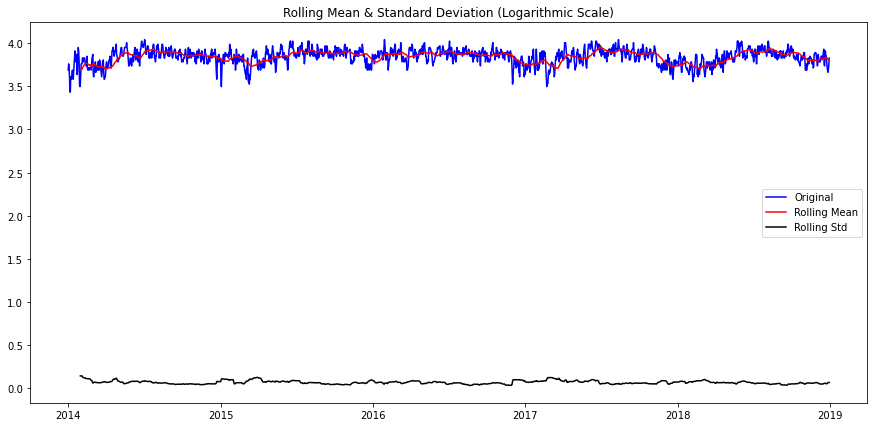

In [15]:
mean_log = first_log.rolling(window=30).mean()
std_log = first_log.rolling(window=30).std()

plt.figure(figsize=(15,7))
plt.plot(first_log, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

from above plot we see constant mean and constant standard deviation which is a basic requirement of stationarity of any 
time series data so there is no need of logrithmic transformation to make data stationary,our data is already stationary.

In [16]:
# Detrending --> It helps to isolate the underlying patterns in the data that are not related to any systematic trend
new_data = first_log - mean_log  
new_data = new_data.dropna()
new_data

,AvgTemp
DATE,
2014-01-30,-0.167793
2014-01-31,-0.054858
2014-02-01,0.068756
2014-02-02,0.067168
2014-02-03,0.062159
...,...
2018-12-26,-0.133812
2018-12-27,-0.151522
2018-12-28,-0.119439


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

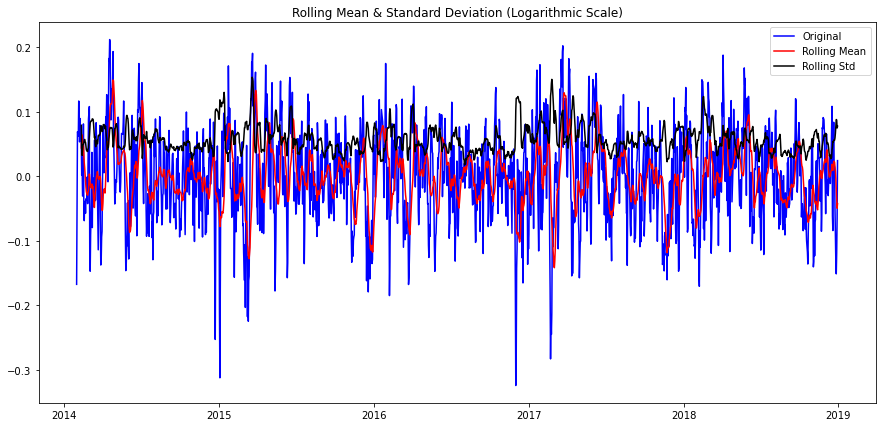

In [17]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.figure(figsize=(15,7))
plt.plot(new_data, color='blue', label='Original')
plt.plot(mean_log, color='red', label='Rolling Mean')
plt.plot(std_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

# checking Stationarity through Differencing

<AxesSubplot:xlabel='DATE'>

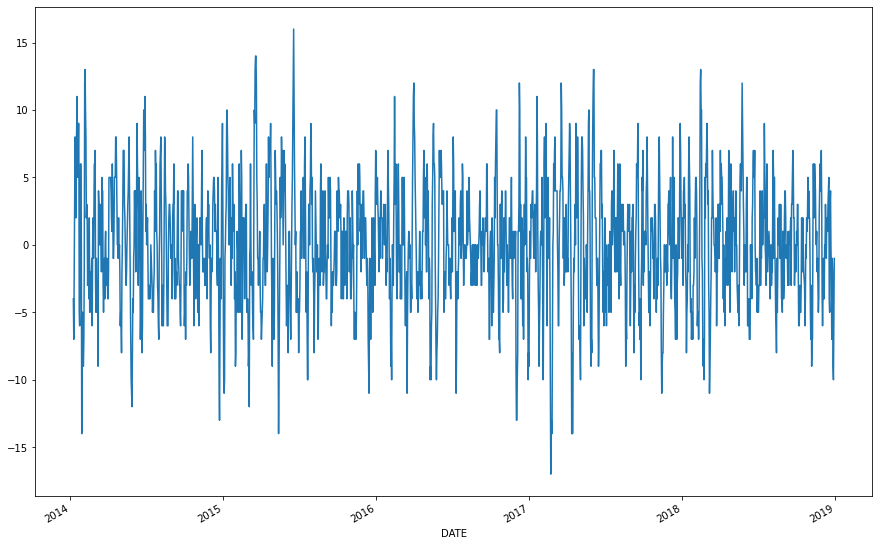

In [18]:
df['differencing'] = df['AvgTemp']- df['AvgTemp'].shift(7)
df['differencing'].plot(figsize=(15,10))

In [ ]:
df.plot(figsize=(15,10))

<AxesSubplot:xlabel='DATE'>

# checking Stationarity through Transformation

<AxesSubplot:xlabel='DATE'>

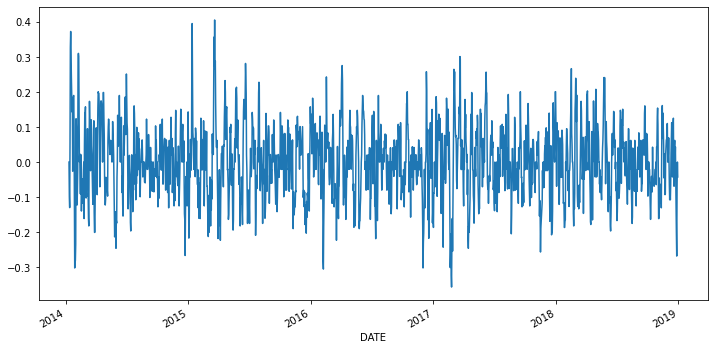

In [42]:
# calculate the log transformation
df['adj_log'] = np.log(df['AvgTemp'])
df['temperature_log_diff'] = df['adj_log']-df['adj_log'].shift(10)
df['temperature_log_diff'].dropna().plot(figsize =(12,6))



<AxesSubplot:xlabel='DATE'>

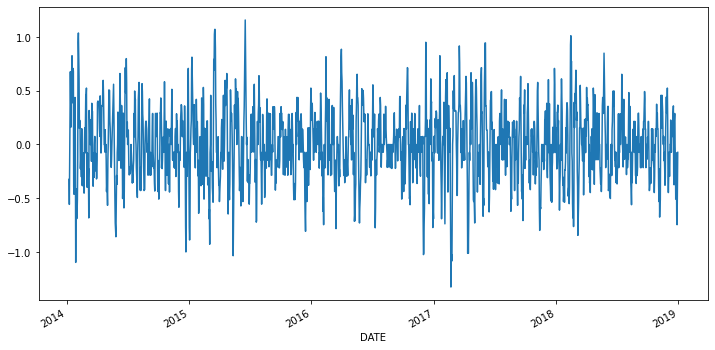

In [43]:
# calculate the sqare root transformation
df['adj_sqrt'] = np.sqrt(df['AvgTemp'])
df['temperature_sqrt_diff'] = df['adj_sqrt']-df['adj_sqrt'].shift(7)
df['temperature_sqrt_diff'].dropna().plot(figsize =(12,6))


# checking Stationarity through ADCF

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
# Test for ADCF
#checking the stationarity of the series 
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['AvgTemp'])
print(result)
result1 = pd.Series(result[0:4], index = ['Test Statistic','p-value','Number of lags used','Numbr of observations used'])
print(result1)

(-6.554680125068785, 8.675937480199322e-09, 12, 1808, {'1%': -3.433972018026501, '5%': -2.8631399192826676, '10%': -2.5676217442756872}, 8146.207832960945)
Test Statistic               -6.554680e+00
p-value                       8.675937e-09
Number of lags used           1.200000e+01
Numbr of observations used    1.808000e+03
dtype: float64


P-value is less than 0.05 that shows data is stationary and there is no need to make it stationary.

# Seasonal Decompose

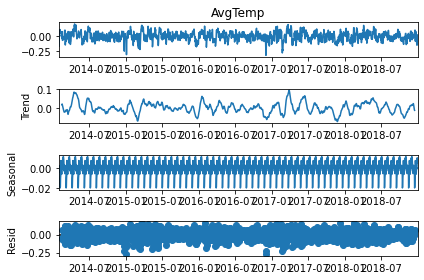

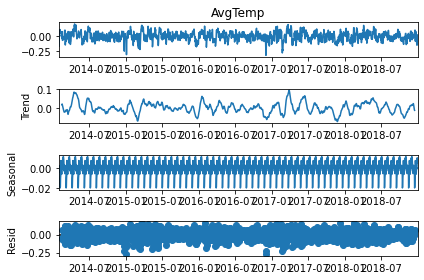

In [87]:

#seasonal Decompose

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(new_data['AvgTemp'].dropna(),model='additive',period =30)

decompose_result.plot()


In [27]:
pip install pmdarima

  Using cached pmdarima-2.0.4-cp39-cp39-win_amd64.whl (614 kB)
Note: you may need to restart the kernel to use updated packages.


In [28]:
#figure out order for arima model
from pmdarima import auto_arima

In [29]:
model_fit = auto_arima(new_data['AvgTemp'],trace = True)
model_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-5722.145, Time=1.54 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-4341.668, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5696.051, Time=0.71 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5298.672, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4343.568, Time=0.28 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5723.965, Time=1.34 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-5596.172, Time=2.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5720.013, Time=1.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-5722.345, Time=4.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-5690.857, Time=3.88 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-5722.339, Time=0.60 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-5720.186, Time=6.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-5725.947, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-5598.137, Time=0.94 sec
 ARIMA(1,0,1)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1792
Model:               SARIMAX(1, 0, 2)   Log Likelihood                2866.974
Date:                Fri, 31 May 2024   AIC                          -5725.947
Time:                        21:21:56   BIC                          -5703.983
Sample:                             0   HQIC                         -5717.838
                               - 1792                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5930      0.037     15.987      0.000       0.520       0.666
ma.L1          0.2227      0.043      5.236      0.000       0.139       0.306
ma.L2          0.0892      0.036      2.498      0.012       0.019       0.159
sigma2         0.0024   7.23e-05     32.992      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                35.19
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.26
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

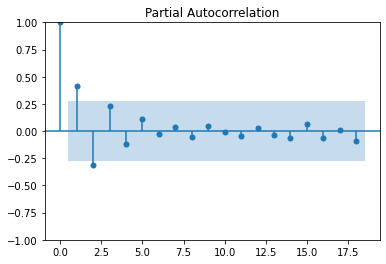

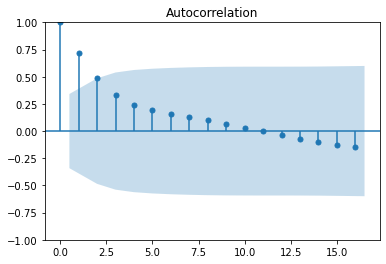

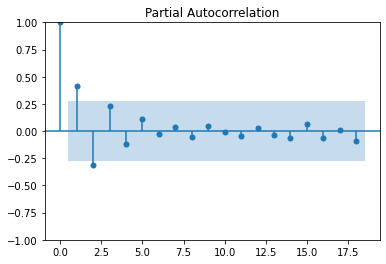

In [30]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(new_data['AvgTemp'])
pacf_plot=pacf(new_data['AvgTemp'],nlags=50)
plot_acf(acf_plot)
plot_pacf(pacf_plot)

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
# SPLIT DATA

print(new_data.shape)
train = new_data.iloc[:1434]['AvgTemp']
test = new_data.iloc[1435:]['AvgTemp']
print(train.shape,test.shape)

(1792, 1)
(1434,) (357,)


In [34]:
# TRAIN THE MODEL

Model = ARIMA(train,order = (1,0,2))
Model_fit = Model.fit()

C:\Users\shaneela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shaneela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shaneela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [35]:
start= len(train)
end=len(train)+len(test)- 1
pred= Model_fit.predict(start= start,end= end,typ ='levels' )
pred


pred.index = df.index[start:end+1]
pred
                                
                                    
#new_data[['pred','AvgTemp']].plot()

C:\Users\shaneela\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


DATE
2017-12-08    0.072255
2017-12-09    0.045270
2017-12-10    0.027835
2017-12-11    0.017142
2017-12-12    0.010585
                ...   
2018-11-26    0.000189
2018-11-27    0.000189
2018-11-28    0.000189
2018-11-29    0.000189
2018-11-30    0.000189
Name: predicted_mean, Length: 357, dtype: float64

<AxesSubplot:xlabel='DATE'>

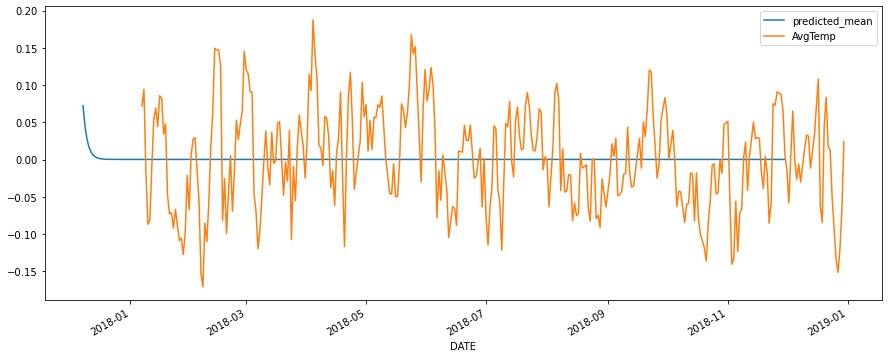

In [36]:
plt.figure(figsize =(15,6))
pred.plot(legend='True')
test.plot(legend='True')

<AxesSubplot:xlabel='DATE'>

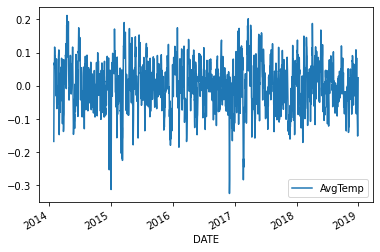

In [37]:
new_data.plot()

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test.mean()
rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

0.06549011975823647


In [39]:
test.mean()

0.0010514951349403113

In [40]:
data = pd.read_csv("MaunaLoaDailyTemps-1 (3).csv",index_col='DATE'   ,parse_dates=True)
data=data.dropna()
print('Shape of data',data.shape)
data.head()

Shape of data (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

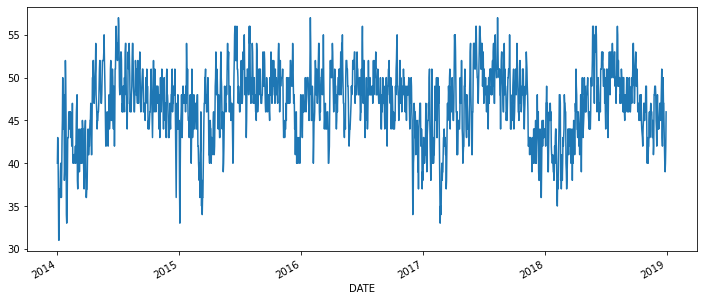

In [41]:
data['AvgTemp'].plot(figsize=(12,5))

In [42]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
            print("\t",key, ": ", val)
            
adf_test(data['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

here p value is very small that means data is stationary

THANK YOU